In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"

In [55]:
ball_milling_data = pd.read_csv('/Users/sarah/Documents/Roux co-op/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/BallMilling ML Data.csv')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 110)]
ball_milling_data.columns

Index(['Tag', 'Ball-Powder Ratio', 'Jar', '20mm Run Time (Hours)',
       '10mm Run Time (Hours)', '6mm Run Time (Hours)',
       'Total Run Time (Hours)', 'Circ.', 'Feret', 'AR', 'Round', 'Area',
       'Mean', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor',
       'Angle', 'IntDen', 'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'Solidity', 'Skew', 'Slice', 'Kurt', 'Median', '%Area',
       'StdDev', 'Min', 'Max', 'X', 'Y'],
      dtype='object')

In [56]:
# sort data out by  differnt groups and milling times
valid_tags_a = ['C1-20', 'C2-20', 'D1-10', 'D2-10', 'E1-10', 'E2-10', 'F1-10', 'F2-10', 'G1-6', 'G2-6', 'H1-6', 'H2-6'] #20-10-6
filtered_df_figa = ball_milling_data[ball_milling_data['Tag'].isin(valid_tags_a)]

valid_tag_b = ['A1', 'A2', 'A3','A4','A5','A6'] #20-10
filtered_df_figb = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_b)]

valid_tag_c = ['J1-20', 'J2-20','K1-6', 'K2-6', 'L1-6', 'L2-6', 'M1-6','M2-6'] #20-6
filtered_df_figc = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_c)]

valid_tag_d = [ '4-Q1-10', '4-Q2-10'] #10-6
filtered_df_figd = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_d)]

valid_tag_e = ['4-P1','4-P2'] #20/10/6
filtered_df_fige = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_e)]

In [51]:
def add_frequency_stats_to_dataframe(DataFrame, target_column_name) :
    '''
    function to calculate frequency statistics to dataframe to plot 
    '''
    df = DataFrame.sort_values(by=target_column_name).copy ()
    frequencies = df[target_column_name].value_counts().sort_index()
    # Map the raw frequency to each row in the DataFrame
    df ["Frequency"] = df [target_column_name].map (frequencies)
    # Calculate cumulative frequency as a percentage of the total count
    cumulative_frequency = frequencies. cumsum() / df.shape [0] * 100
    df ["Cumulative Frequency"] = df [target_column_name].map (cumulative_frequency)
    # Add particle number column
    df ["Particle_number"] = np.arange(1, len(df) + 1)
    
    return df

df = add_frequency_stats_to_dataframe(filtered_df_fige, target_column_name='Feret')
df

,Tag,Ball-Powder Ratio,Jar,20mm Run Time (Hours),10mm Run Time (Hours),6mm Run Time (Hours),Total Run Time (Hours),Circ.,Feret,AR,...,Median,%Area,StdDev,Min,Max,X,Y,Frequency,Cumulative Frequency,Particle_number
59874,4-P1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.749,40.000,1.313,...,255,100,0,255,255,211.205,898.668,1,0.062539,1
60983,4-P1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.769,40.162,1.345,...,255,100,0,255,255,126.039,569.046,2,0.187617,2
40595,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.704,40.162,1.567,...,255,100,0,255,255,544.850,530.774,2,0.187617,3
60692,4-P1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.712,40.249,1.185,...,255,100,0,255,255,315.443,666.429,3,0.375235,4
59973,4-P1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.753,40.249,1.489,...,255,100,0,255,255,698.009,691.879,3,0.375235,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40243,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.771,109.563,1.206,...,255,100,0,255,255,988.776,470.118,1,99.749844,1595
40241,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.722,109.636,1.375,...,255,100,0,255,255,1034.707,367.769,1,99.812383,1596
40808,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.676,109.809,1.165,...,255,100,0,255,255,263.187,682.080,1,99.874922,1597
39946,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.769,109.895,1.381,...,255,100,0,255,255,859.646,70.641,1,99.937461,1598


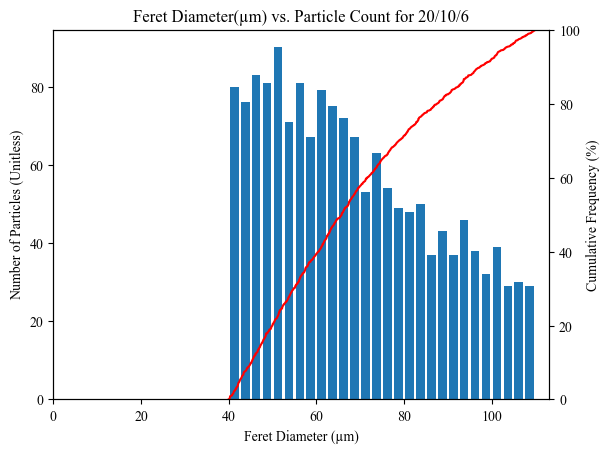

In [52]:
fig, ax1 = plt.subplots()
# sort data based on run times
ax1.hist(df['Feret'], bins=28, rwidth=0.8)
ax1.set_xlim(left=0)
#ax1.set_xticks(np.arange(0, 120, 10))
ax1.set_xlabel('Feret Diameter (µm)')
ax1.set_ylabel('Number of Particles (Unitless)')
ax1.set_title('Feret Diameter(µm) vs. Particle Count for 20/10/6')

# Create a secondary y-axis (ax2)
ax2 = ax1.twinx()
ax2.plot(df['Feret'], df['Cumulative Frequency'], color='red')
ax2.set_ylabel('Cumulative Frequency (%)')
ax2.set_ylim(0, 100)

# Show the plot
# include number of particles and unitless, include units, do both sieved and unsieved 
plt.show()

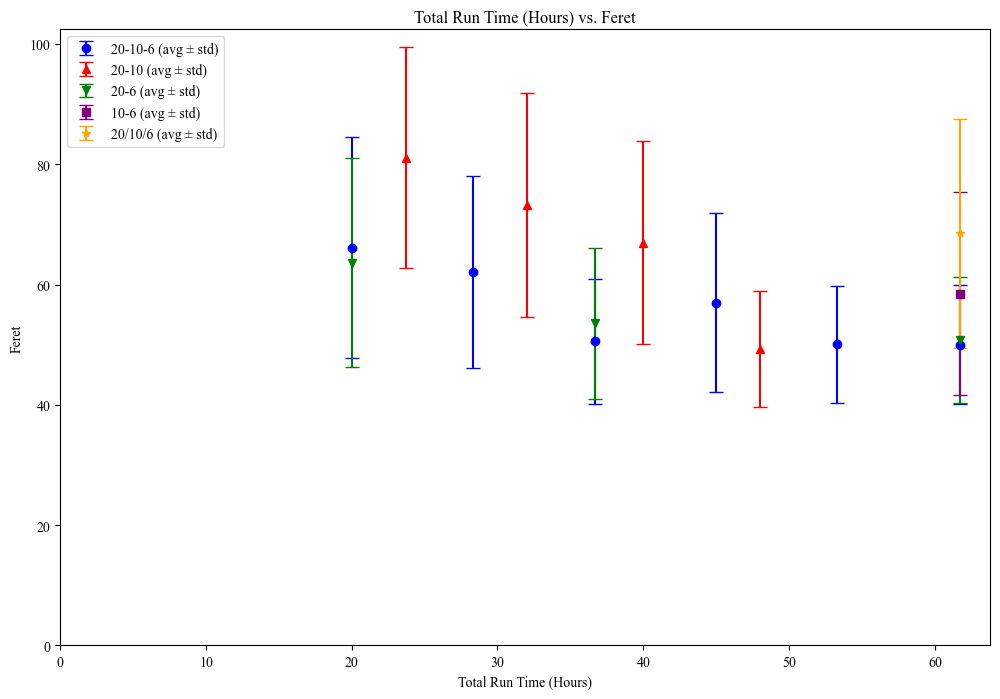

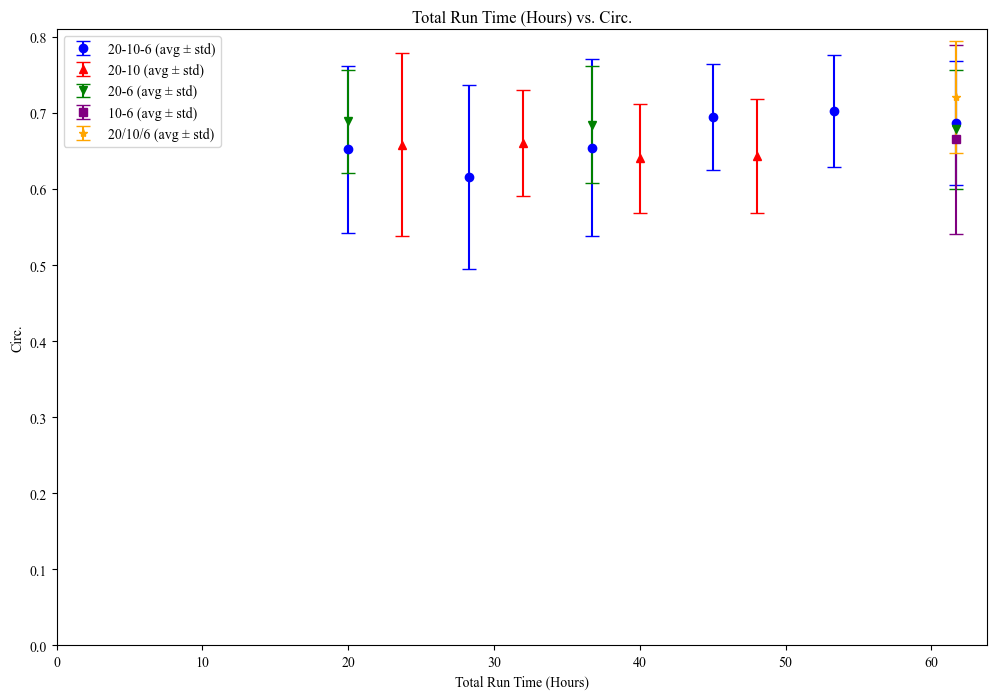

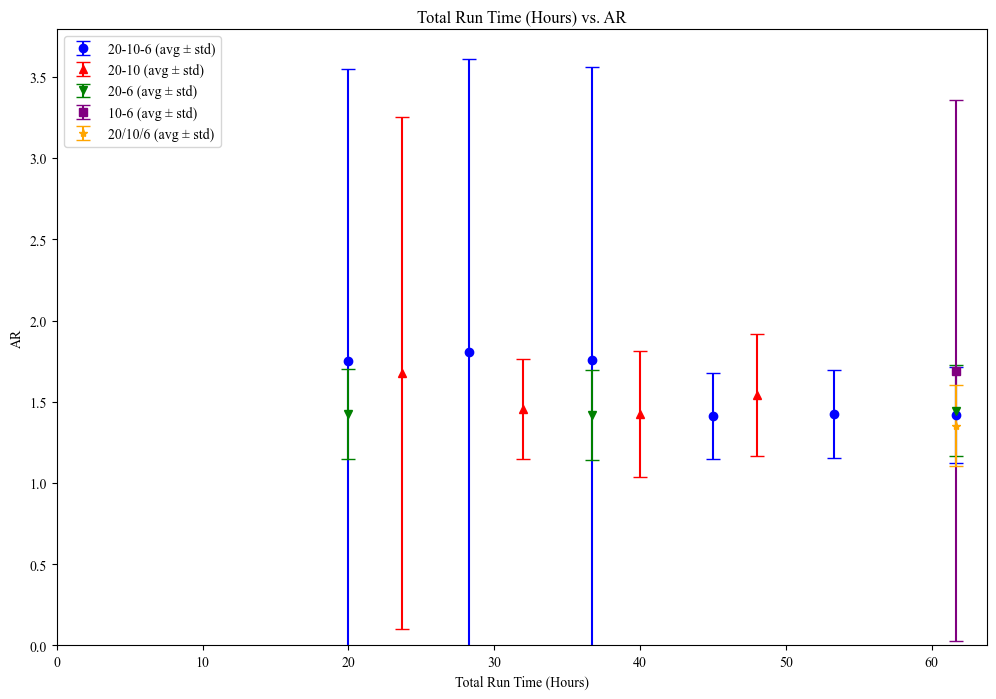

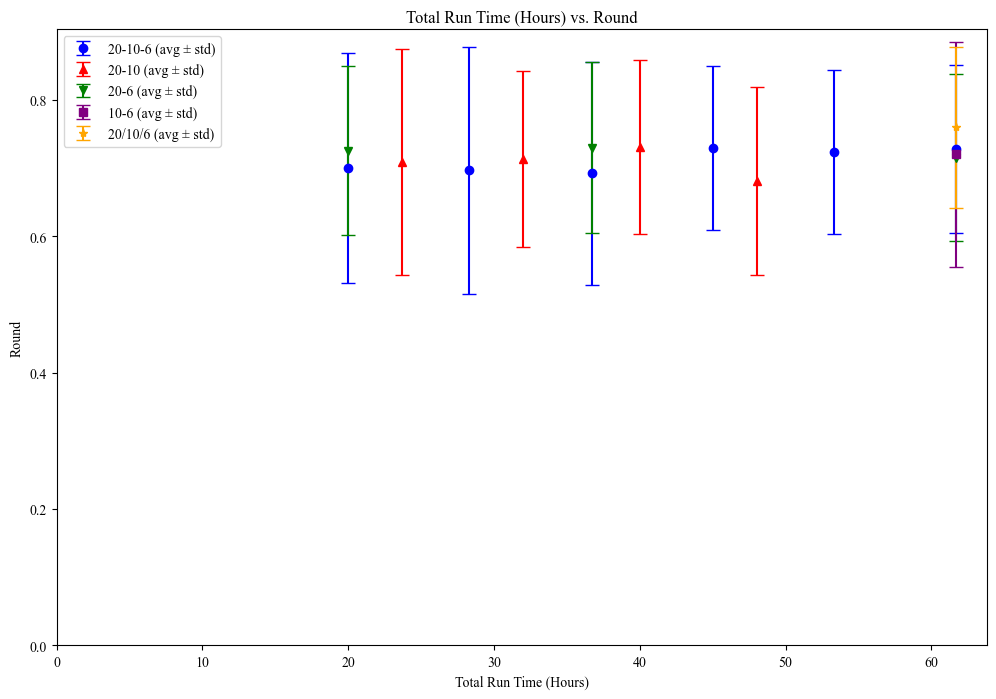

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_time_vs_parameter(filtered_df_figa, filtered_df_figb, filtered_df_figc, filtered_df_figd, filtered_df_fige,parameters):
    for parameter in parameters:
        # Create a new figure for each parameter
        plt.figure(figsize=(12, 8))
        
        # Calculate averages and standard deviations for scatter plot
        grouped_a = filtered_df_figa.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_b = filtered_df_figb.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_c = filtered_df_figc.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_d = filtered_df_figd.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_e = filtered_df_fige.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        
        # Scatter plot with error bars
        plt.errorbar(grouped_a['Total Run Time (Hours)'], grouped_a['mean'], yerr=grouped_a['std'], 
                     fmt='o', color='blue', label='20-10-6 (avg ± std)', capsize=5)
        plt.errorbar(grouped_b['Total Run Time (Hours)'], grouped_b['mean'], yerr=grouped_b['std'], 
                     fmt='^', color='red', label='20-10 (avg ± std)', capsize=5)
        plt.errorbar(grouped_c['Total Run Time (Hours)'], grouped_c['mean'], yerr=grouped_c['std'], 
                     fmt='v', color='green', label='20-6 (avg ± std)', capsize=5)
        plt.errorbar(grouped_d['Total Run Time (Hours)'], grouped_d['mean'], yerr=grouped_d['std'], 
                     fmt='s', color='purple', label='10-6 (avg ± std)', capsize=5)
        plt.errorbar(grouped_e['Total Run Time (Hours)'], grouped_e['mean'], yerr=grouped_e['std'], 
                     fmt='*', color='orange', label='20/10/6 (avg ± std)', capsize=5)

        # Add labels, title, and legend
        plt.xlabel('Total Run Time (Hours)')
        plt.ylabel(parameter)
        plt.title(f'Total Run Time (Hours) vs. {parameter}')
        plt.legend()
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        
        # Display the plot
        plt.show()


plot_time_vs_parameter(filtered_df_figa, filtered_df_figb, filtered_df_figc, filtered_df_figd, filtered_df_fige, parameters=['Feret','Circ.','AR','Round'])